# PFF - Final Project

**Name:** Alexandre Correa Alves

**Status:** Done

**Date:** 2023/14/09

This notebook is intended for the presentation of the final project of the Python For Finance course conducted by the institutions [Trading com Dados](https://www.tradingcomdados.com.br/) and [Florida International University](https://www.fiu.edu/).

The main idea of the final project is to deliver the most relevant plots about the chosen stocks for the presentation and enable the analyses that helped us understand the financial market and macroeconomics and how they are interconnected.

## Initial Setup

### Install Libs

"Run the cell below only if you haven't installed all the packages listed in the requirements, as indicated in the README."

In [1]:
#!pip install yfinance --q --no-cache
#!pip install nasdaq-data-link --no-cache --q

### Imports

In [2]:
import yfinance as yf
import nasdaqdatalink as ndl
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## Let's get start!

### Selecting 5 stocks and collecting the Adj Close data.

In [3]:
tickers = ["CPLE6.SA", "TAEE11.SA","CPFE3.SA", "VIVT3.SA", "ELET6.SA"]

In [4]:
def get_companies_adjclose(tickers_list : list) -> pd.DataFrame:

  """
    Get adjusted closing prices of a list of stock tickers.

    Parameters:
    tickers_list (list): List of stock tickers.

    Returns:
    pd.DataFrame: A DataFrame containing the adjusted closing prices for the specified tickers.

    Example:
    tickers = ["AAPL", "MSFT", "GOOGL"]
    df = get_companies_adjclose(tickers)
  """

  df_companies_adjclose = yf.download(tickers_list, start = "2021-01-01")["Adj Close"]

  return df_companies_adjclose

### Deepening our understanding of the data behavior.

In [5]:
df_companies_adjclose = get_companies_adjclose(tickers)
df_companies_adjclose

[*********************100%%**********************]  5 of 5 completed


,CPFE3.SA,CPLE6.SA,ELET6.SA,TAEE11.SA,VIVT3.SA
Date,,,,,
2021-01-04,23.034868,5.419114,30.883387,25.436659,38.405788
2021-01-05,22.925249,5.337441,29.996132,25.482910,38.079739
2021-01-06,22.917942,5.344063,29.825504,25.529156,37.653397
2021-01-07,22.106752,5.204997,29.262438,24.781479,36.700352
2021-01-08,22.961788,5.394832,30.115568,25.321037,37.661751
...,...,...,...,...,...
2023-09-19,35.459999,9.000000,38.299999,35.009998,44.337395
2023-09-20,35.770000,9.030000,39.110001,35.090000,44.676456
2023-09-21,35.730000,9.030000,38.139999,34.980000,44.187809


In [6]:
df_companies_adjclose.describe()

,CPFE3.SA,CPLE6.SA,ELET6.SA,TAEE11.SA,VIVT3.SA
count,681.000000,681.000000,681.000000,680.000000,681.000000
mean,27.074507,6.468849,37.676346,33.499934,40.443302
std,4.726594,1.184399,5.854244,3.494069,3.530871
min,18.793203,4.310274,24.314270,23.440266,34.409142
25%,22.328484,5.354784,32.390472,31.341060,37.536884
50%,28.021469,6.550589,37.816570,34.154612,39.697807
75%,30.924347,7.460000,42.310635,36.154324,43.133980
max,35.770000,9.070000,52.798527,39.524529,50.183205


In [7]:
def get_graphics(df : object) -> go.Figure():

  """
    Generate multiple types of graphical representations for the provided DataFrame.

    Parameters:
    df (object): A DataFrame containing the data for visualization.

    Returns:
    go.Figure: A Figure containing multiple subplots of different chart types.

    Example:
    df = pd.DataFrame(...)
    fig = get_graphics(df)
    fig.show()
  """

  fig_box = px.box(df, y = df.columns[1:], title="Box - Comparison of Variable Distributions.", template = "simple_white")
  fig_line = px.line(df, y = df.columns[1:], title="Time Series Plot", template = "simple_white")
  fig_hist = px.histogram(df, y = df.columns[1:], title="Histogram", template = "simple_white")
  fig_bar = px.bar(df, y = df.columns[1:], title="Bar Graph", template = "simple_white")

  return fig_box.show(), fig_line.show(), fig_hist.show(), fig_bar.show();

In [8]:
get_graphics(df_companies_adjclose)

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



(None, None, None, None)

As we can observe in the above graph, we have identified an **outlier** below the minimum in the company **TAEE11**. In this case, it is a **data point** that we should **pay attention** to, depending on our strategy for model creation and direction of our analyses.

We have noticed that the **scale of the data** is **disproportionate**, which can potentially cause various issues in our analyses and charts. Therefore, we will **need to normalize our data**.

**Different Averages:** Price averages of stocks **vary significantly** among companies, which means that some stocks are **naturally more expensive than others**, perhaps due to performance or company size.

**Varied Volatility:** Some stocks are more **"volatile" than others**, meaning their prices can **rise** and **fall** more unpredictably. This is important to determine if you have a **tolerance** for risk or not.

**Price Variation:** Some stocks have prices that **fluctuate significantly**, ranging from low to high values in a **short period** of time. This may be **relevant** if you **prefer** stocks with **intense** price **movements**.

**Central Tendency:** Typically, most stocks have prices that cluster around an average value, but some may exhibit larger variations.

**Percentiles:** This indicates where most of the price variations occur, helping to understand what the most common price range is for a stock.

### Fixing the normalization issue

To solve our **normalization problem**, I will use **min-max normalization**, where I will **take all rows** of the dataset and **divide them by the first row**, thus scaling all values in relation to the value of the first row, so that the first row has all values equal to 1, and the subsequent values in the rows will be proportional to the scale of the first row.

**Equation:**

$$
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}\
$$

* X_norm is the normalized value.
* X is the original value.
* X_min is the minimum value of the variable across the entire dataset.
* X_max is the maximum value of the variable across the entire dataset.

In [9]:
df_companies_adjclose_norm = df_companies_adjclose / df_companies_adjclose.iloc[0]
df_companies_adjclose_norm

,CPFE3.SA,CPLE6.SA,ELET6.SA,TAEE11.SA,VIVT3.SA
Date,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-05,0.995241,0.984929,0.971271,1.001818,0.991510
2021-01-06,0.994924,0.986151,0.965746,1.003636,0.980409
2021-01-07,0.959708,0.960489,0.947514,0.974243,0.955594
2021-01-08,0.996827,0.995519,0.975138,0.995455,0.980627
...,...,...,...,...,...
2023-09-19,1.539405,1.660788,1.240149,1.376360,1.154446
2023-09-20,1.552863,1.666324,1.266377,1.379505,1.163274
2023-09-21,1.551127,1.666324,1.234968,1.375181,1.150551


### Introducing the graphs now normalized

In [10]:
get_graphics(df_companies_adjclose_norm)

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



(None, None, None, None)

Now, as we can see, our data **doesn't have such a large disparity in their scales**, and this is **very beneficial** for our future **analyses** as it makes reading graphs easier. As we can now observe a **second outlier** for the company **TAEE11**, this will also be beneficial for our future machine learning modeling efforts.

### Macroeconomic x S&P 500 - Analisys

In this section, we will use the **S&P 500** data to analyze the **real impacts** of **inflation** on the **financial market**. To make this analysis feasible, we will use the **Interest Rates** and **inflation** data from the [Nasdaq Data Link source](https://data.nasdaq.com/).

In our analysis, we will select the start date from **2018-01-01 until the current day**. This way, we will be able to have data for a relevant analysis with the possible variations that **COVID-19** may have caused.

#### Getting Data

##### Macroeconomic Data

In [11]:
def get_macroeconomic_data() -> pd.DataFrame:

  """
    Retrieve macroeconomic data related to interest rates and inflation for the USA.

    Returns:
    pd.DataFrame: A DataFrame containing macroeconomic data for interest rates and inflation.

    Example:
    df_interest_rate_usa, df_inflation_usa = get_macroeconomic_data()
  """

  df_interest_rate_usa = ndl.get("FRED/EFFR", start_date = "2018-01-01",)# collapse = "monthly",)
  df_inflation_usa = ndl.get("RATEINF/INFLATION_USA", start_date = "2018-01-01", collapse = "monthly",)

  return df_interest_rate_usa, df_inflation_usa

In [12]:
df_interest_rate_usa, df_inflation_usa = get_macroeconomic_data()

In [13]:
df_interest_rate_usa.head()

,Value
Date,
2018-01-02,1.42
2018-01-03,1.42
2018-01-04,1.42
2018-01-05,1.42
2018-01-08,1.42


In [14]:
df_inflation_usa.head()

,Value
Date,
2018-01-31,2.071
2018-02-28,2.212
2018-03-31,2.360
2018-04-30,2.463
2018-05-31,2.801


##### S&P 500

In [15]:
def get_sp500_adjclose(ticker : str) -> pd.DataFrame:

  """
    Retrieve adjusted closing prices of a specified S&P 500 ticker.

    Parameters:
    ticker (str): Ticker symbol of the S&P 500 stock.

    Returns:
    pd.DataFrame: A DataFrame containing the adjusted closing prices for the specified ticker.

    Example:
    df_sp500_adjclose, df_sp500_adjclose_describe = get_sp500_adjclose("^GSPC")
  """

  sp500_adjclose = yf.download(ticker, start = "2018-01-01")["Adj Close"]
  df_sp500_adjclose = pd.DataFrame(sp500_adjclose)


  return df_sp500_adjclose, df_sp500_adjclose.describe()

In [16]:
df_sp500_adjclose, df_sp500_adjclose_describe = get_sp500_adjclose("^GSPC")

[*********************100%%**********************]  1 of 1 completed


In [17]:
df_sp500_adjclose

,Adj Close
Date,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961
...,...
2023-09-18,4453.529785
2023-09-19,4443.950195
2023-09-20,4402.200195


In [18]:
df_sp500_adjclose_describe

,Adj Close
count,1441.000000
mean,3547.101617
std,679.833211
min,2237.399902
25%,2880.340088
50%,3550.500000
75%,4155.379883
max,4796.560059


#### Plotting Graphics

In [19]:
def plot_sp500_x_macroeconomic(df_sp500 : pd.DataFrame, df_macroeconomic : pd.DataFrame, name1 : str, name2 : str, title : str) -> go.Figure:

  """
    Create a subplot showing the relationship between S&P 500 data and macroeconomic data.

    Parameters:
    df_sp500 (pd.DataFrame): DataFrame containing S&P 500 data.
    df_macroeconomic (pd.DataFrame): DataFrame containing macroeconomic data.
    name1 (str): Name for the first data series (S&P 500).
    name2 (str): Name for the second data series (macroeconomic).
    title (str): Title for the plot.

    Returns:
    go.Figure: A Figure containing the subplot.

    Example:
    sp500_data = pd.DataFrame(...)
    macro_data = pd.DataFrame(...)
    fig = plot_sp500_x_macroeconomic(sp500_data, macro_data, "S&P 500", "Macroeconomic Data", "Comparison")
  """

  fig = make_subplots(rows = 1, cols = 1, specs = [[{"secondary_y" : True}]])

  fig.add_trace(go.Scatter(name = name1, x = df_sp500.index, y = df_sp500["Adj Close"]), row = 1, col = 1)
  fig.add_trace(go.Scatter(name = name2, x = df_macroeconomic.index, y = df_macroeconomic.Value), row = 1, col = 1, secondary_y = True)

  fig.update_layout(title_text = title, template = "simple_white")

  return fig.show()

##### S&P 500 x Interest Rates

In [20]:
correlation_interest_sp500 = df_interest_rate_usa.Value.corr(df_sp500_adjclose["Adj Close"])
correlation_interest_sp500

-0.7218930344491447

In [21]:
df_sp500_adjclose_norm = df_sp500_adjclose / df_sp500_adjclose.iloc[0]
df_interest_rate_usa_norm = df_interest_rate_usa / df_interest_rate_usa.iloc[0]
plot_sp500_x_macroeconomic(df_sp500_adjclose_norm, df_interest_rate_usa_norm, "S&P 500", "Interest Rates", "S&P 500 vs Interest Rates")

**Disclaimer:** For reasons I am unaware of, Nasdaq Data Link is only returning interest rate data up to July 2022.

For a more thorough analysis of the scenario, it would be essential to have access to all the data, but for now, I believe we can proceed as it is an academic project.

The correlation of **-0.7218** between the **interest rate** in the United States and the **S&P 500** suggests a **significant inverse statistical relationship** between these two variables.

**Monetary Policy:** The interest rate in the US is a key tool of monetary policy. When the Federal Reserve (the central bank of the US) raises interest rates, it becomes more expensive to borrow for investments in the stock market. Therefore, an increase in interest rates tends to discourage investors and can lead to a decline in stock prices, as represented by the S&P 500.

**Market Psychology:** The correlation can also be influenced by market psychology. For instance, investors may react negatively to news of interest rate hikes, even if it doesn't have an immediate direct impact on the fundamentals of companies. This can trigger stock market sell-offs.

It is important to note that the relationship between interest rates and the performance of the stock market is complex and influenced by a variety of factors. The statistical correlation does not imply direct causation but suggests that changes in interest rates may be one of the factors influencing fluctuations in the S&P 500. Investors and analysts should consider all economic and market variables when making investment decisions.

##### S&P 500 x Inflation USA

In [22]:
correlation_inflation_usa_sp500 = df_inflation_usa.Value.corr(df_sp500_adjclose["Adj Close"])
correlation_inflation_usa_sp500

0.6832452741748374

In [23]:
df_sp500_adjclose_norm = df_sp500_adjclose / df_sp500_adjclose.iloc[0]
df_inflation_usa_norm = df_inflation_usa / df_inflation_usa.iloc[0]
fig_sp500_x_inflation_usa = plot_sp500_x_macroeconomic(df_sp500_adjclose_norm, df_inflation_usa_norm, "S&P 500", "Inflation USA", "S&P 500 vs Inflation USA")

A correlation of **0.6986** between **inflation** in the United States and the **S&P 500** index indicates a statistically significant association between these two phenomena, but it does not necessarily imply direct causality.

**Positive correlation:** The **positive correlation** suggests that, on average, when **inflation in the United States increases**, the value of the **S&P 500 also tends to rise**. This means that there is a general tendency for stock markets to perform better during periods of higher inflation.

**Indirect causality:** The correlation **does not establish direct causality**. There may be other factors at play that affect both inflation and the stock market. For instance, economic policies, interest rates, economic growth, and global events can influence both indicators.

### Analyzing American Big Techs.

#### Selecting the companies

In [24]:
tickers_big_tech = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']
tickers_big_tech

['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']

In [25]:
def get_big_tech_fundamentals(tickers_list : list) -> pd.DataFrame():
  """
    Retrieve fundamental data for a list of big tech companies.

    :param tickers_list: List of stock tickers for big tech companies.
    :type tickers_list: list
    :return: DataFrame containing fundamental data for the specified companies.
    :rtype: pd.DataFrame
  """
  data = []

  for ticker_big_tech in tickers_big_tech:

    company = yf.Ticker(ticker_big_tech)
    fundamental_data = company.info

    fundamental_items = {
        "company_name" : fundamental_data.get("longName"),
        "market_cap" : fundamental_data.get("marketCap"),
        "enterprise_value": fundamental_data.get("enterpriseValue"),
        "total_revenue" : fundamental_data.get("totalRevenue"),
        "profit_margin": fundamental_data.get("profitMargins"),
        "operation_margin" : fundamental_data.get("operatingMargins"),
        "dividend_rate" : fundamental_data.get("dividendRate"),
        "beta" : fundamental_data.get("beta"),
        "ebitda" : fundamental_data.get("ebitda")
    }

    data.append(fundamental_items)

  df_big_tech_fundamentals = pd.DataFrame(data)

  df_big_tech_fundamentals = df_big_tech_fundamentals.fillna(0)

  return df_big_tech_fundamentals, df_big_tech_fundamentals.describe()

In [26]:
df_big_tech_fundamentals, df_big_tech_fundamentals_describe = get_big_tech_fundamentals(tickers_big_tech)

In [27]:
df_big_tech_fundamentals

,company_name,market_cap,enterprise_value,total_revenue,profit_margin,operation_margin,dividend_rate,beta,ebitda
0,Apple Inc.,2733483491328,2766059864064,383932989440,0.24681,0.29231,0.96,1.274896,123957002240
1,Microsoft Corporation,2353599348736,2342217318400,211914997760,0.34146,0.41773,3.00,0.904564,102022995968
2,"Amazon.com, Inc.",1346380103680,1442543960064,538046005248,0.02429,0.03291,0.00,1.235822,63431000064
3,Alphabet Inc.,1647091384320,1555817955328,289531002880,0.21052,0.26437,0.00,1.059820,91374002176
4,"Meta Platforms, Inc.",767779471360,744493023232,120524996608,0.18706,0.29219,0.00,1.234094,44913999872


In [28]:
df_big_tech_fundamentals_describe

,market_cap,enterprise_value,total_revenue,profit_margin,operation_margin,dividend_rate,beta,ebitda
count,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000e+00
mean,1.769667e+12,1.770226e+12,3.087900e+11,0.202028,0.259902,0.792000,1.141839,8.513980e+10
std,7.854767e+11,7.944076e+11,1.607826e+11,0.115470,0.140132,1.302429,0.156584,3.130523e+10
min,7.677795e+11,7.444930e+11,1.205250e+11,0.024290,0.032910,0.000000,0.904564,4.491400e+10
25%,1.346380e+12,1.442544e+12,2.119150e+11,0.187060,0.264370,0.000000,1.059820,6.343100e+10
50%,1.647091e+12,1.555818e+12,2.895310e+11,0.210520,0.292190,0.000000,1.234094,9.137400e+10
75%,2.353599e+12,2.342217e+12,3.839330e+11,0.246810,0.292310,0.960000,1.235822,1.020230e+11
max,2.733483e+12,2.766060e+12,5.380460e+11,0.341460,0.417730,3.000000,1.274896,1.239570e+11


#### Graphical analysis of Big Techs

In [29]:
def big_tech_graphics(df : pd.DataFrame) -> go.Figure:

  """
    Create a subplot figure displaying various financial metrics for big tech companies.

    :param df: DataFrame containing fundamental data for big tech companies.
    :type df: pd.DataFrame
    :return: Plotly Figure object.
    :rtype: go.Figure
  """
  
  fig = make_subplots(
      rows = 4,
      cols = 2,
      row_heights = [4,4,4,4],
      column_widths = [4,4],
      subplot_titles = ('Market Cap', 'Enterprise Value', 'Total Revenue',
        'Profit Margin', 'Operation Margin', 'Dividend Rate', 'Beta', 'Ebitda'),
      shared_xaxes = False)

  fig.add_trace(go.Bar(name = "Market Cap", x = df.company_name, y = df.market_cap), row = 1, col = 1)
  fig.add_trace(go.Bar(name = "Enterprise Value", x = df.company_name, y = df.enterprise_value), row = 1, col = 2)

  fig.add_trace(go.Bar(name = "Total Revenue", x = df.company_name, y = df.total_revenue), row = 2, col = 1)
  fig.add_trace(go.Bar(name = "Profit Margin", x = df.company_name, y = df.profit_margin), row = 2, col = 2)

  fig.add_trace(go.Bar(name = "Operation Margin", x = df.company_name, y = df.operation_margin), row = 3, col = 1)
  fig.add_trace(go.Bar(name = "Dividend Rate", x = df.company_name, y = df.dividend_rate), row = 3, col = 2)

  fig.add_trace(go.Bar(name = "Beta", x = df.company_name, y = df.beta), row = 4, col = 1)
  fig.add_trace(go.Bar(name = "Ebitda", x = df.company_name, y = df.ebitda), row = 4, col = 2)

  fig.update_layout(title_text = "Evaluation of the tech sector", template = "plotly_dark", showlegend = False, height = 1200, width = 900)

  return fig


In [30]:
big_tech_plots = big_tech_graphics(df_big_tech_fundamentals)
big_tech_plots.show()

These companies are leaders in the technology sector and have **different financial profiles and business strategies**. **Apple and Microsoft** have the **highest market valuations**, with **Microsoft having the highest profit margin**. **Amazon** has a **large revenue but lower profit margins.** **Alphabet** (the parent company of Google) also has a **high profit margin**, while **Meta Platforms** (formerly Facebook) has a **significant market valuation**. It's important to note that the **dividend rate** for **Amazon**, **Alphabet**, and **Meta Platforms** is **zero**, which means that these companies **do not distribute dividends to shareholders**.

Based on the data presented, **Microsoft stands out for its high profit margin and dividend policy**, which can be **attractive to long-term investors** seeking a combination of growth and capital returns. However, the final choice should be based on a more comprehensive analysis that takes into account all the factors mentioned above, as well as your own **goals and risk tolerance**. It is always advisable to consult a financial advisor or conduct more in-depth research before making investment decisions.

## Post on Linkedin

[Post on LinkedIn](https://www.linkedin.com/embed/feed/update/urn:li:share:7108161409384951810)


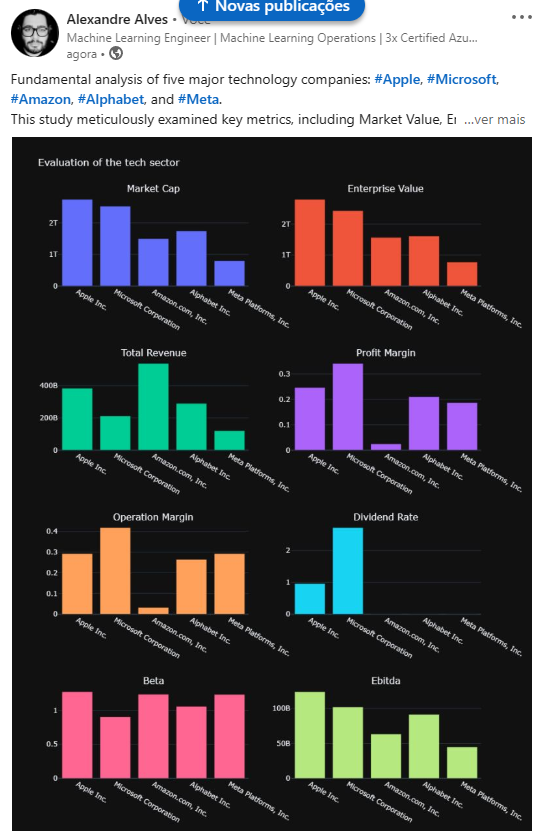